# 1.) Import the data from CCLE into a new Google Colab file

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/ECON 441B ML Lab/W2/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [5]:
df.loc[df.sex =='male','sex'] = 0
df.loc[df.sex =='female','sex'] = 1

df.loc[df.smoker =='yes','smoker'] = 1
df.loc[df.smoker =='no','smoker'] = 0

from sklearn import preprocessing
regions = preprocessing.LabelEncoder()
regions.fit(['southwest', 'southeast','northwest', 'northeast'])
df.region = regions.transform(df.region)

# df['southwest'] = np.where(df.region == 'southwest', 1,0)
# df['southeast'] = np.where(df.region == 'southeast', 1,0)
# df['northwest'] = np.where(df.region == 'northwest', 1,0)
# df['northeast'] = np.where(df.region == 'northeast', 1,0)
# df = df.drop('region', axis=1)

# df.loc[df.region =='soutwest','region'] = 1
# df.loc[df.region =='southeast','region'] = 2
# df.loc[df.region =='northwest','region'] = 3
# df.loc[df.region =='northeast','region'] = 4

In [6]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,10600.54830
1334,18,1,31.920,0,0,0,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


# 2.) Split the data into 80/20, in/out sample

In [7]:
# scikit learn model's input, except for the last column
data = np.array(df.iloc[:,:-1])
target = np.array(df.iloc[:,-1])
target

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [8]:
cut = int( (len(data)*.8) // 1)
cut

1070

In [9]:
in_data = data[:cut]
out_data = data[cut:]

in_target = target[:cut]
out_target = target[cut:]
in_target

array([16884.924  ,  1725.5523 ,  4449.462  , ...,  5757.41345,
       14349.8544 , 10928.849  ])

# 3.) Normalize the Data

In [10]:
from sklearn import preprocessing

In [11]:
# subtract the mean and divided by std
# use only in sample data NOT full set
scaler = preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)
out_data_scale = scaler.transform(out_data)

In [12]:
in_data_scale

array([[-1.45390122,  1.02077653, -0.47403991, -0.90286618,  1.99417757,
         1.34066165],
       [-1.52464584, -0.97964634,  0.4911621 , -0.06353793, -0.50145986,
         0.4373191 ],
       [-0.81719959, -0.97964634,  0.36455128,  1.61511857, -0.50145986,
         0.4373191 ],
       ...,
       [-0.03900872, -0.97964634,  1.95211949, -0.90286618, -0.50145986,
        -1.36936599],
       [ 1.65886228, -0.97964634, -1.50008089, -0.06353793, -0.50145986,
        -0.46602344],
       [ 1.02216066,  1.02077653,  0.18367867, -0.06353793, -0.50145986,
         0.4373191 ]])

# 4.) Get lambda from Lasso cross validation

In [13]:
# use function LassoCV
# import LassoCV
from sklearn.linear_model import LassoCV
modCV = LassoCV().fit(in_data_scale, in_target)
a = modCV.alpha_
a

133.34880015958146

# 5.) Run a lasso regression with that Lambda

In [14]:
# fit Lasso using
from sklearn.linear_model import Lasso
mod1 = Lasso(alpha=a).fit(in_data_scale, in_target)
# coefficient
mod1.coef_

array([3564.26137833,    0.        , 1890.8527485 ,  398.24050447,
       9324.84227138, -326.52198757])

# 6.) Visualize the coefficients 

Text(0.5, 1.0, 'Lasso Regression Coefficients')

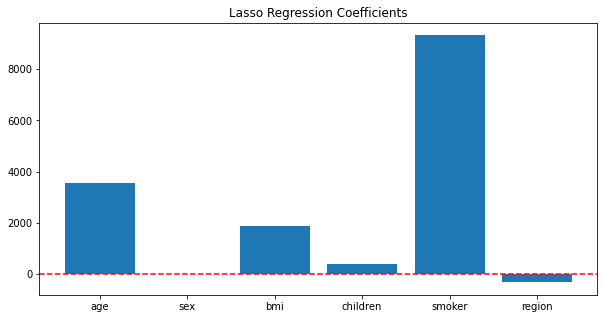

In [15]:
fig = plt.figure(figsize=(10,5))
plt.bar(df.columns[:-1],mod1.coef_)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.title('Lasso Regression Coefficients')

# 7.) Interpret the coefficients

Five variables survived in the Lasso regression: age, bmi, children, smoker, and region. While 'smoker', 'age', 'bmi', and 'children' have positive effects on 'charges', 'region' has a negative effect. Among them, 'smoker' has the most influential effect and it is followed by 'age, 'bmi', 'children', and 'region'.

# 8.) Compare in and out of sample MSE’s

In [16]:
from sklearn.metrics import mean_squared_error

# in sample
in_data_prediction = mod1.predict(np.array(in_data_scale))
MSE_in = mean_squared_error(in_target, in_data_prediction)

# out of sample
out_data_prediction = mod1.predict(np.array(out_data_scale))
MSE_out = mean_squared_error(out_target, out_data_prediction)

print(' In Sample MSE:', MSE_in, '\n','Out Of Sample MSE:', MSE_out)

 In Sample MSE: 36490415.101693384 
 Out Of Sample MSE: 37252730.724018715


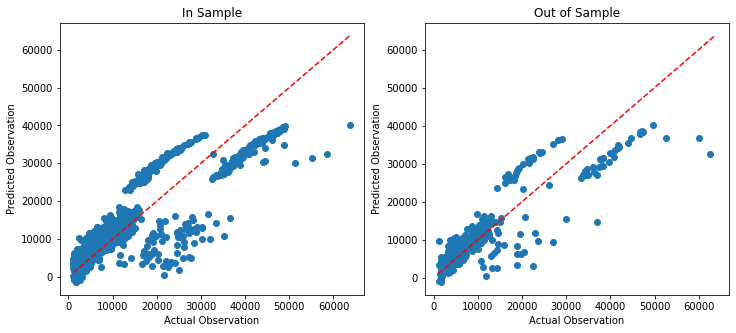

In [17]:
# Graph
lineStart = in_target.min() 
lineEnd = in_target.max()

fig, ax = plt.subplots(1,2, figsize=(12, 5))
ax[0].scatter(x = in_target, y = in_data_prediction)
ax[0].set_xlabel("Actual Observation")
ax[0].set_ylabel("Predicted Observation")
ax[0].set_title('In Sample')
ax[0].plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r', linestyle='--')

ax[1].scatter(x = out_target, y = out_data_prediction)
ax[1].set_xlabel("Actual Observation")
ax[1].set_ylabel("Predicted Observation")
ax[1].set_title('Out of Sample')
ax[1].plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r', linestyle='--')

plt.show()